## Classifying Spam messages

In [2]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [ ]:
# Loading the dataset
# df = pd.read_csv('Spam SMS Collection', sep='\t', names=['label', 'message'])
df = pd.read_csv('spam.csv')

In [4]:
import pandas as pd
import chardet

# Detect the encoding
with open('spam.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Use the detected encoding to read the CSV file
df = pd.read_csv('spam.csv', encoding=result['encoding'])




# EDA Part
Checking null values & plotting required graphs.


In [25]:
df.head(5)

,category,raw_text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [26]:
# Rename columns
df.rename(columns={'v1': 'category', 'v2': 'raw_text'}, inplace=True)

In [27]:
df.head(5)

,category,raw_text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [28]:
df1=df[['category','raw_text']]

In [29]:
df1.head(5)

,category,raw_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
df1.describe()

,category,raw_text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5572 non-null   object
 1   raw_text  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [32]:
# Mapping values for label
df1['category'] = df1['category'].map({'ham': 0, 'spam': 1})

<ipython-input-32-c333069d6af0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['category'] = df1['category'].map({'ham': 0, 'spam': 1})


In [33]:
df1.head()

,category,raw_text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [41]:
df1.shape

(5572, 2)

In [34]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

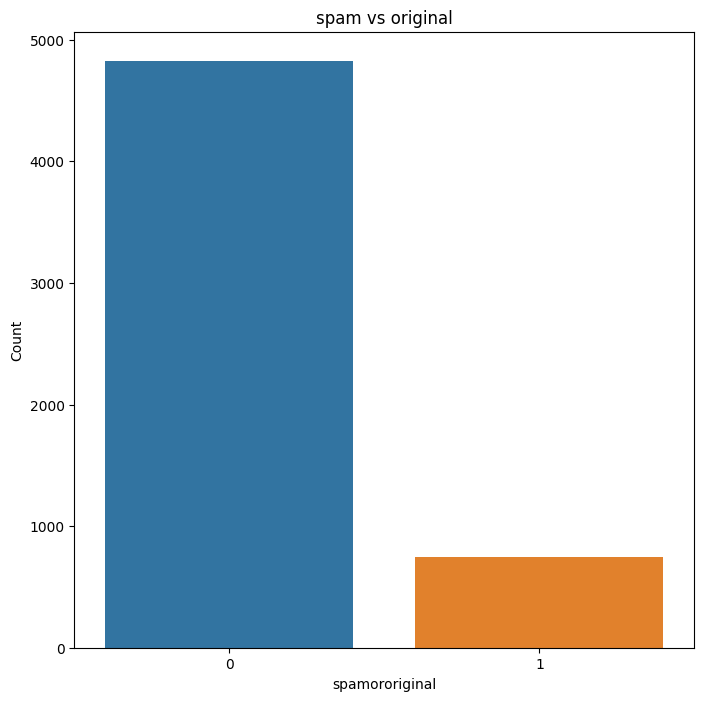

In [35]:
# Countplot for Spam vs. Ham as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='category', data=df1)
p = plt.title('spam vs original')
p = plt.xlabel('spamororiginal')
p = plt.ylabel('Count')

The above plot indicates imbalanced dataset so need to do some feature engineering.

## Feature Engineering
- Handling imbalanced dataset using Oversampling
- Creating new features e.g. word_count, contains_currency_symbol, contains_numbers, etc.

In [40]:
# Handling imbalanced dataset using Oversampling
only_spam = df1[df1['category']==1]
print('Number of Spam records: {}'.format(only_spam.shape[0]))
print('Number of Ham records: {}'.format(df1.shape[0]-only_spam.shape[0]))

Number of Spam records: 747
Number of Ham records: 4825


In [47]:
count = int((df1.shape[0]-only_spam.shape[0])/only_spam.shape[0])
for i in range(0, count-1):
  df1 = pd.concat([df1, only_spam])

df1.shape

(9307, 2)

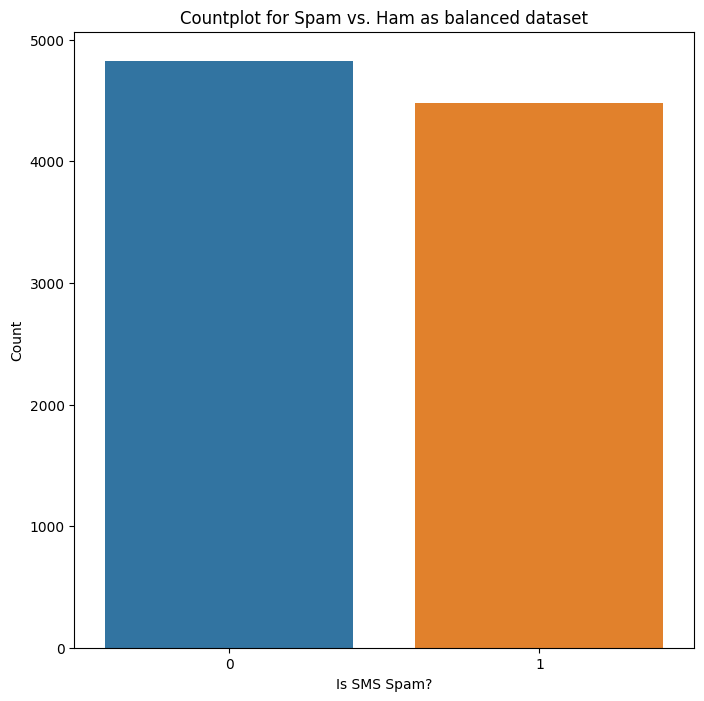

In [48]:
# Countplot for Spam vs. Original as balanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='category', data=df1)
p = plt.title('Countplot for Spam vs. Ham as balanced dataset')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')

In [51]:
# Creating new feature word_count
df1['word_count'] = df1['raw_text'].apply(lambda x: len(x.split()))

In [52]:
df1.head(5)

,category,raw_text,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


<ipython-input-53-2fe926ae08a9>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df1[df1['category']==0].word_count)
<ipython-input-53-2fe926ae08a9>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df[df['category']==1].word_count, color='red')


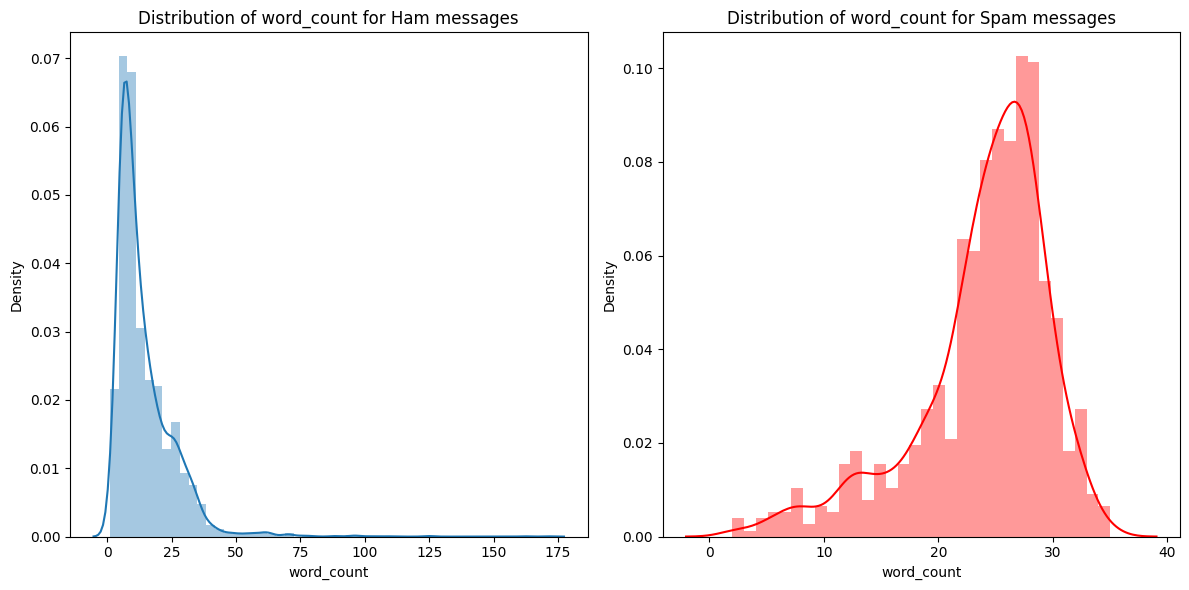

In [53]:
plt.figure(figsize=(12, 6))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=df1[df1['category']==0].word_count)
p = plt.title('Distribution of word_count for Ham messages')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=df[df['category']==1].word_count, color='red')
p = plt.title('Distribution of word_count for Spam messages')

plt.tight_layout()
plt.show()

Insight:Spam messages word_count fall in the range of 20-35 words, whereas majority of the Ham messages fall in the range of below 20 words

In [55]:
# Creating feature contains_currency_symbol
def currency(x):
  currency_symbols = ['€', '$', '¥', '£', '₹']
  for i in currency_symbols:
    if i in x:
      return 1
  return 0

df1['contains_currency_symbol'] = df1['raw_text'].apply(currency)

In [58]:
df1.tail(5)

,category,raw_text,word_count,contains_currency_symbol
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0
5567,1,This is the 2nd time we have tried 2 contact u...,30,1


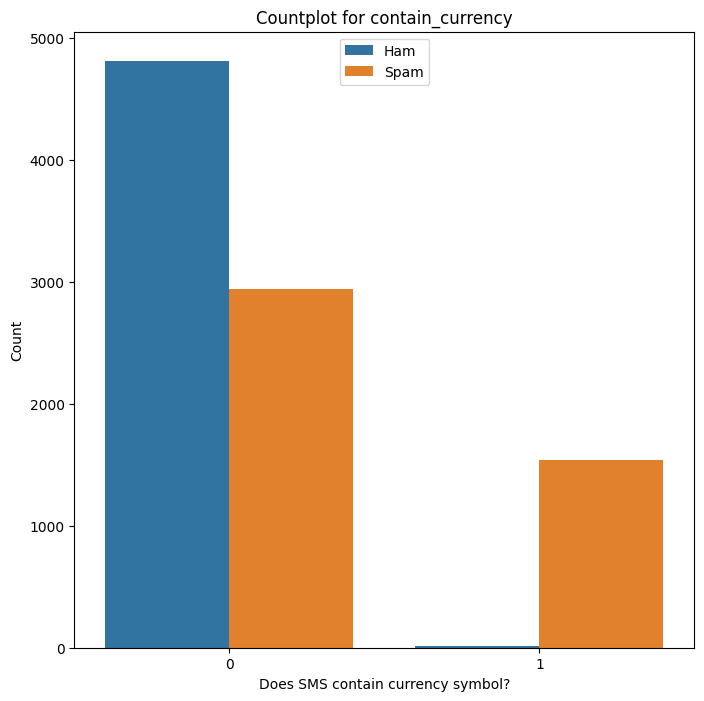

In [59]:
# Countplot for contains_currency_symbol
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbol', data=df1, hue='category')
p = plt.title('Countplot for contain_currency')
p = plt.xlabel('Does SMS contain currency symbol?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

####Insight:
Almost 1/3 of Spam messages contain currency symbols, and currency symbols are rarely used in Ham messages.

In [61]:
# Creating feature contains_number
def numbers(x):
  for i in x:
    if ord(i)>=48 and ord(i)<=57:
      return 1
  return 0

df1['contains_number'] = df1['raw_text'].apply(numbers)

In [62]:
df1.head()

,category,raw_text,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0


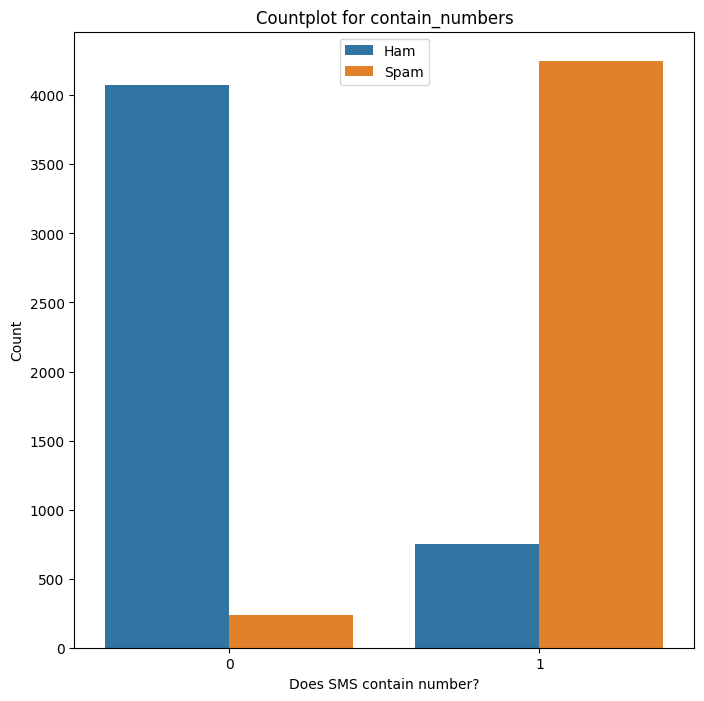

In [63]:
# Countplot for contains_number
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_number', data=df1, hue='category')
p = plt.title('Countplot for contain_numbers')
p = plt.xlabel('Does SMS contain number?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

#### Insight:
It is evident that most of the Spam messages contain numbers and majority of the Ham messages donot contain numbers.

# Data Cleaning
 Removing special character and numbers using regular expression
 Converting the entire sms into lower case
 Tokenizing the sms by words
 Removing the stop words
 Lemmatizing the words
 Joining the lemmatized words
 Building a corpus of messages

In [64]:
# Importing essential libraries for performing NLP
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [65]:
# Cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(df1.raw_text):

  # Cleaning special character from the sms
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

  # Converting the entire sms into lower case
  message = message.lower()

  # Tokenizing the sms by words
  words = message.split()

  # Removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

  # Joining the lemmatized words
  message = ' '.join(lemmatized_words)

  # Building a corpus of messages
  corpus.append(message)

In [66]:
corpus[0:3]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply']

In [68]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df1['category']

# Model Building & Evaluation
##Metric: F1-Score

* Multiomail Naive Bayes: 0.943
* Decision Tree: 0.98
* **Random Forest (Ensemble): 0.994**
* Voting (Multinomial Naive Bayes + Decision Tree): 0.98

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [71]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.20)

In [72]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for MNB model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for MNB model: 0.944 ---
Standard Deviation: 0.004


In [73]:
# Classification report for MNB model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print('--- Classification report for MNB model ---')
print(classification_report(y_test, y_pred))

--- Classification report for MNB model ---
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       979
           1       0.94      0.95      0.94       883

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



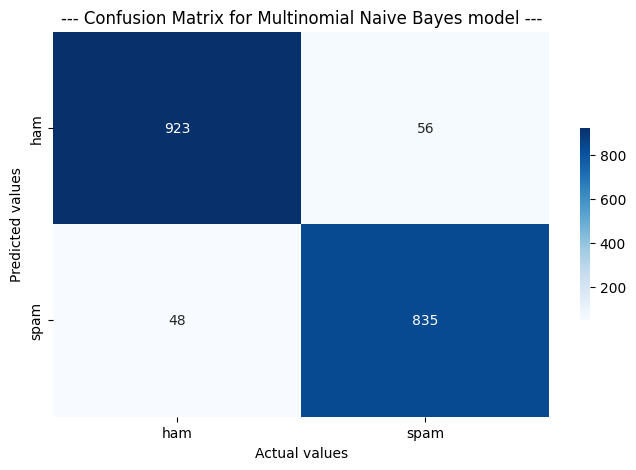

In [74]:
# Confusion matrix of MNB model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Multinomial Naive Bayes model ---')

In [78]:
# Fitting Decision Tree to the Training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Decision Tree model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Decision Tree model: 0.98 ---
Standard Deviation: 0.005


In [76]:
# Classification report for Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('--- Classification report for Decision Tree model ---')
print(classification_report(y_test, y_pred))

--- Classification report for Decision Tree model ---
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       979
           1       0.95      1.00      0.98       883

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



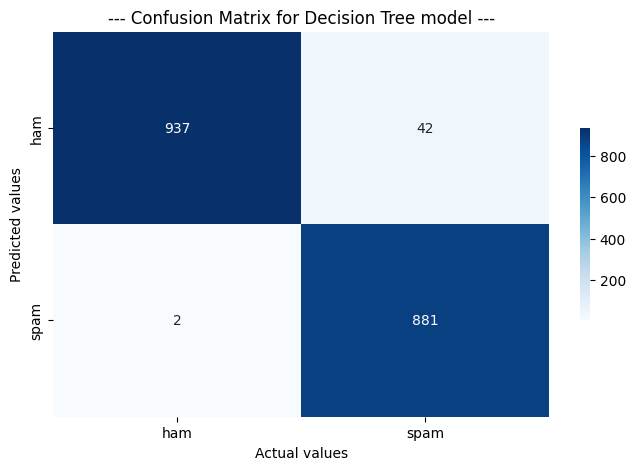

In [77]:
# Confusion matrix of Decision Tree model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Decision Tree model ---')

In [79]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
cv = cross_val_score(rf, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Random Forest model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Random Forest model: 0.994 ---
Standard Deviation: 0.003


In [80]:
# Classification report for Random Forest model
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('--- Classification report for Random Forest model ---')
print(classification_report(y_test, y_pred))

--- Classification report for Random Forest model ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       979
           1       0.99      1.00      0.99       883

    accuracy                           1.00      1862
   macro avg       1.00      1.00      1.00      1862
weighted avg       1.00      1.00      1.00      1862



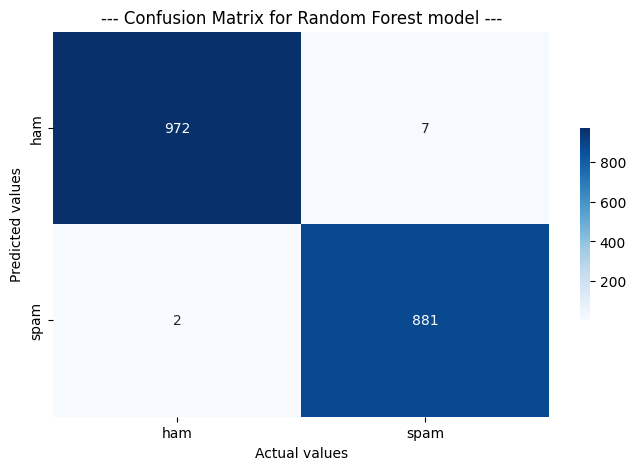

In [81]:
# Confusion matrix of Random Forest model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Random Forest model ---')

 #### Decision Tree & MNB algorithms are selected and fed to Voting algorithm to increase the F1-Score!

In [82]:
# Fitting Decision Tree and MNB to VotingClassifier
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier([('decision_tree', dt), ('m_naive_bayes', mnb)], weights=[2,1])
cv = cross_val_score(vc, X, y, cv=10, scoring='f1')

print('--- Average F1-Score for VotingClassifier model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for VotingClassifier model: 0.981 ---
Standard Deviation: 0.003


### Voting algorithm did not out-perform Random Forest algorithm, hence Random Forest algorithm is selected for predicting the results of this problem statement.

## Making Predictions

In [83]:
def predict_spam(sample_message):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  final_message = [wnl.lemmatize(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = tfidf.transform([final_message]).toarray()
  return rf.predict(temp)

In [84]:
# Prediction 1 - Lottery text message
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [85]:
# Prediction 2 - Casual text chat
sample_message = 'Came to think of it. I have never got a spam message before.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [86]:
# Prediction 3 - Transaction confirmation text message
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1,300 will be drafted from your Wells Fargo Account ******0000 within 24-48 business hours. Thank you!'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Creating the stacked LSTM model

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [96]:
model=Sequential()
# This line creates a sequential model, which is a linear stack of layers.
# In a sequential model, you can simply add one layer at a time,
# starting from the input layer and progressing to the output layer.

model.add(LSTM(50,return_sequences=True,input_shape=(500,1)))
# This line adds the first LSTM layer to the model:

# LSTM(50): It is an LSTM layer with 50 units (neurons). The number of units determines the dimensionality of the output space.
# return_sequences=True: This parameter is set to True because you want to return the full sequence of outputs for each input sequence.
#  This is important when stacking multiple LSTM layers.

model.add(LSTM(50,return_sequences=True))
# This line adds a second LSTM layer with the same configuration. It is common to use return_sequences=True when stacking LSTM layers

model.add(LSTM(50))
#This line adds a third LSTM layer without return_sequences=True.
#This means that the third LSTM layer only returns the output for the last time step in the sequence.
model.add(Dense(1))
#This line adds a dense layer with a single unit. The dense layer is the output layer
#in this case, and it produces a single output value.

model.compile(loss='mean_squared_error', optimizer='adam')
# This line compiles the model, specifying the loss function and optimizer to be used during training:

# loss='mean_squared_error': It is a mean squared error loss function, commonly used for regression problems.
# optimizer='adam': It uses the Adam optimizer, which is an optimization algorithm that is widely used in machine learning.

In [97]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 500, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 500, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [99]:
# Assuming X_train and X_test are pandas DataFrames
import numpy as np

X_train = X_train.values
X_test = X_test.values

# Reshape the input for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [95]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 100, 1), found shape=(None, 500, 1)
